# Neural Nets Code

In this notebook we will learn how we could use a neural network to predict cancer based on medical images. 

#### Start by importing packages



In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


## Load the data

Again we will use a dataset built-in to Sklearn that includes data related to diagnosing breast cancer.

In [7]:

cancer = load_breast_cancer()

# print('Dataset raw object', cancer)
print('Dataset description', cancer['DESCR'])


Dataset description .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, 

## Split into our training and testing XY sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

## Exercise 1: Scale the data

The Multilayer Perceptron (MLP) approach is one of the few that doesn't automatically scale the data, so let's do that. Here we will use Numpy to do it manually, though there are alternative built-in methods within scikit-learn.

In the code block below, use `X_train.mean(axis=0)` and similar functions to scale ALL of the X variables so that they have mean 0 and standard deviation 1. HINT: X_train and others are numpy arrays and so you can use fast raster math, e.g., `X_train - mean_on_train`.

## Exercise 1 Answer

In [9]:
# Exercies 1 Code

# Using numpy functions, compute the mean value per feature on the training set and the STD.
# May want to remind ourselves what the X_train looks like.
print('X_train', X_train)

# Numpy arrays have a .mean() method attached to each array. 
# Below we use that, though note that we have to specify which axis we should calculate the mean on.
# `axis=0` specifies that we want the mean of each column (which is how the separate variables are stored)

mean_on_train = X_train.mean(axis=0)
# print('mean_on_train', mean_on_train)


# the .std() function is similarily powerful/fast.
std_on_train = X_train.std(axis=0)
# print('std_on_train', std_on_train)


# Still using the Numpy awesomeness,
# subtract the mean, and scale by inverse standard deviation,
# making it  mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train



X_train [[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


## Create the MLP model object and fit it

Using this new scaled training data, we are ready to define a Neural Net, Known here as a Multi-Layer-Perceptron (MLP) classifier. Because this next line hides away millions of other lines of code, you may want to explore it. In VS Code, you can navigate to a function's definition by placing your cursor in the function and press f-12. Try it in the cell below on the `MLPClassifier` code! The best documentation is often the code itself.


In [10]:
mlp = MLPClassifier(random_state=0)

# Now fit it with the scaled X and y TRAINING data.
mlp.fit(X_train_scaled, y_train)

print(mlp)


MLPClassifier(random_state=0)


c:\Users\jajohns\AppData\Local\mambaforge\envs\8222env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Assess the fit

Now we assess MLP's accuracy on the TRAINING and the TESTING data.

Notice here also I'm introducing another convenient way of combining strings and numbers. The {:.2f} specifies a placeholder for a 2-digit representation of a floating point number. The Format method then places that floating point value into that placeholder.


In [11]:
score_train = mlp.score(X_train_scaled, y_train)
score_test = mlp.score(X_test_scaled, y_test)

print("Accuracy on training set: {:.3f}".format(score_train))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.965


## Plot the inputs and hidden layers of the neural net

It can be hard perhaps to visualize what exaclty the neural net looks like (there is no coefficients table to simply look at). But here, it is small enough to actually visualize the coefficients within the network.

Below, we plot the coeffs_ array to see it.

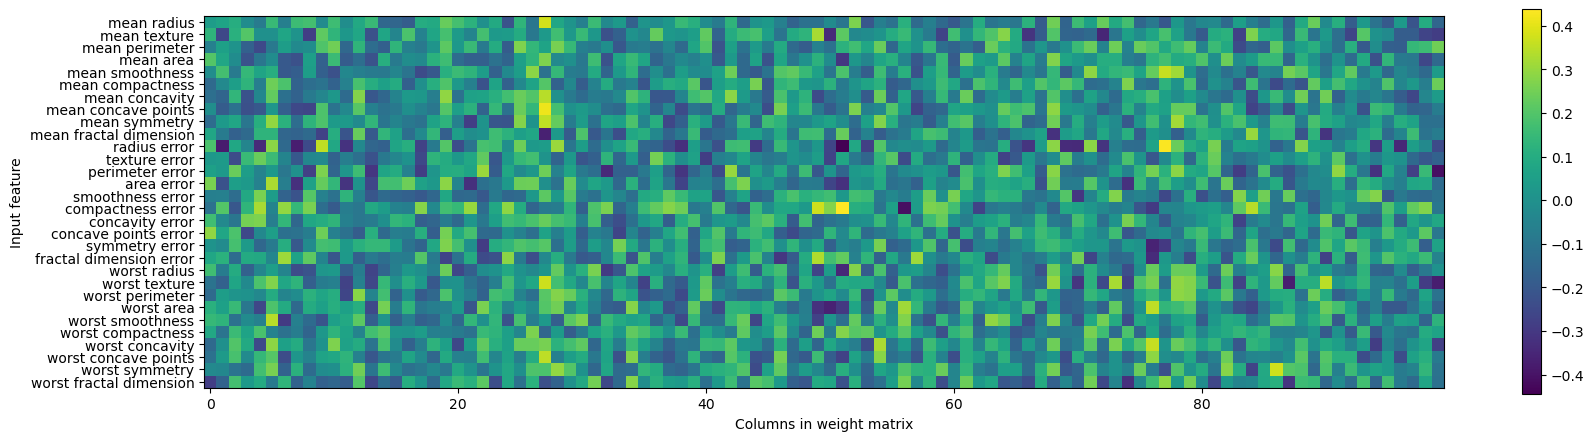

In [12]:

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

## Exercies 5.1.2: Understanding which features matter most

One of the massive challenges in Neural Nets is understanding why exactly it makes the predictions it does. Can you identify which input feature shows the largest positive effect on on cancer diagnosis?

You probably can't make heads or tails of it. Let's create a greatly simplified version of our neural network to try to see if we can understand it.

Specifically create a new `MLPClassifier` but this time make it have only a single hidden layer. Hint: use f-12 on the MLPClassifier code to see it's documentation and figure out what new input variable you sohuld specify when calling `mlp = MLPClassifier( .......  )`. Plot the output coefficients just like above. With only a single layer, the variables become somewhat more interpretable. 

Which variable now seems to have the largest positive impact?

In [13]:
# Excercise 5.1.2 workspace

